In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("halong_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2024,5,28,141,10,500,NaN
1,2/29/2024,64,37,149,10,500,NaN
2,2/28/2024,39,25,146,14,500,NaN
3,2/27/2024,24,10,141,21,500,NaN
4,2/26/2024,43,37,145,11,500,NaN
...,...,...,...,...,...,...,...
1823,3/5/2019,48,17,16,1,500,NaN
1824,3/4/2019,27,3,4,16,500,NaN
1825,3/3/2019,43,28,5,9,500,NaN
1826,3/2/2019,59,55,1,6,500,NaN


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1828 non-null   object 
 1   pm25    1828 non-null   int64  
 2   pm10    1828 non-null   int64  
 3   o3      1828 non-null   int64  
 4   no2     1828 non-null   int64  
 5   so2     1828 non-null   int64  
 6   co      0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 100.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.0,0.0
mean,39.897155,23.573851,17.550875,9.650985,500.0,NaN
std,23.213375,13.615468,18.279145,7.957032,0.0,NaN
min,5.000000,3.000000,1.000000,1.000000,500.0,NaN
25%,22.000000,13.000000,8.000000,1.000000,500.0,NaN
50%,37.000000,22.000000,13.000000,9.000000,500.0,NaN
75%,54.000000,32.000000,21.000000,15.000000,500.0,NaN
max,163.000000,86.000000,268.000000,36.000000,500.0,NaN


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,5,28
1,64,37
2,39,25
3,24,10
4,43,37
...,...,...
1823,48,17
1824,27,3
1825,43,28
1826,59,55


<Axes: >

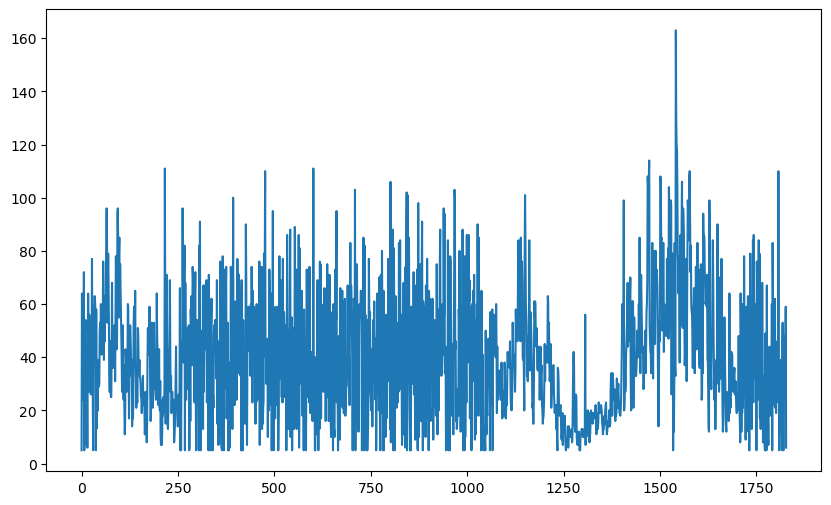

In [5]:
data['pm25'].plot(figsize=(10,6))

In [6]:
# Split the data into training, testing
train_size = int(0.7 * len(data))
test_size = int(0.3 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1279
Test data size: 549


In [7]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit()

In [8]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'o3'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))

In [9]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index = data.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)

# Dự đoán cho 30 ngày tiếp theo
y_next_30_days = model_fitted.forecast(model_fitted.endog[-model_fitted.k_ar:], steps=30)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[[35.04030203 20.64298221]
 [38.00258207 22.07509015]
 [38.80865342 22.62252881]
 [39.05571355 22.79857258]
 [39.13288769 22.85394681]
 [39.15706194 22.87130988]
 [39.16463743 22.87675174]
 [39.1670115  22.87845719]
 [39.16775551 22.87899167]
 [39.16798868 22.87915917]
 [39.16806175 22.87921166]
 [39.16808465 22.87922811]
 [39.16809183 22.87923327]
 [39.16809408 22.87923488]
 [39.16809478 22.87923539]
 [39.168095   22.87923555]
 [39.16809507 22.8792356 ]
 [39.16809509 22.87923561]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]
 [39.1680951  22.87923562]]


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 26.49470516876819

Testing MAE: 21.286112009973884

Testing MAPE: 88.84728635333164


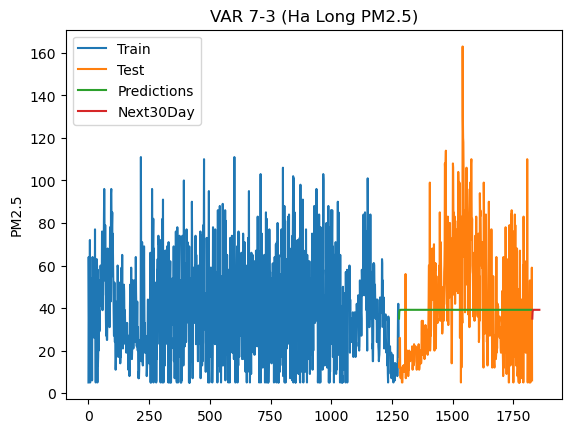

In [16]:
# 9. Vẽ biểu đồ
# Biểu đồ cho 'pm25'
plt.plot(train_data.index, train_data['pm25'])
plt.plot(test_data.index, test_data['pm25'])
plt.plot(test_data.index, y_pred[:, 0])
plt.plot(next_30_days_index, y_next_30_days[:, 0]) 
plt.legend(['Train', 'Test', 'Predictions','Next30Day'],loc='upper left')
plt.title('VAR 7-3 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()

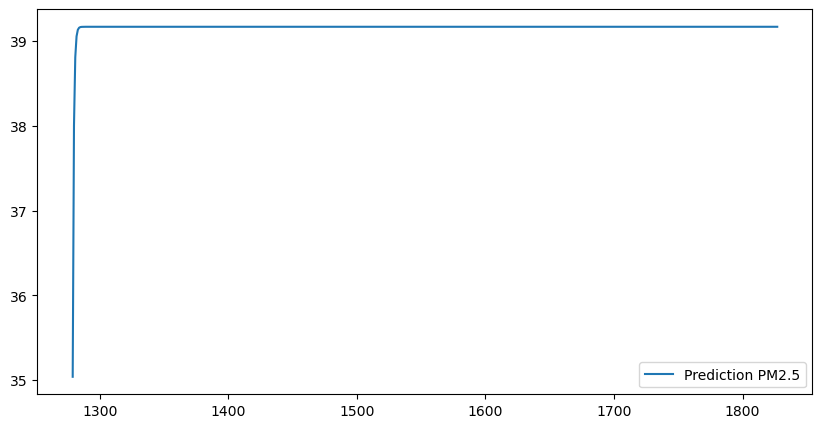

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, y_pred[:,0]) 
plt.legend(['Prediction PM2.5'])
plt.show()

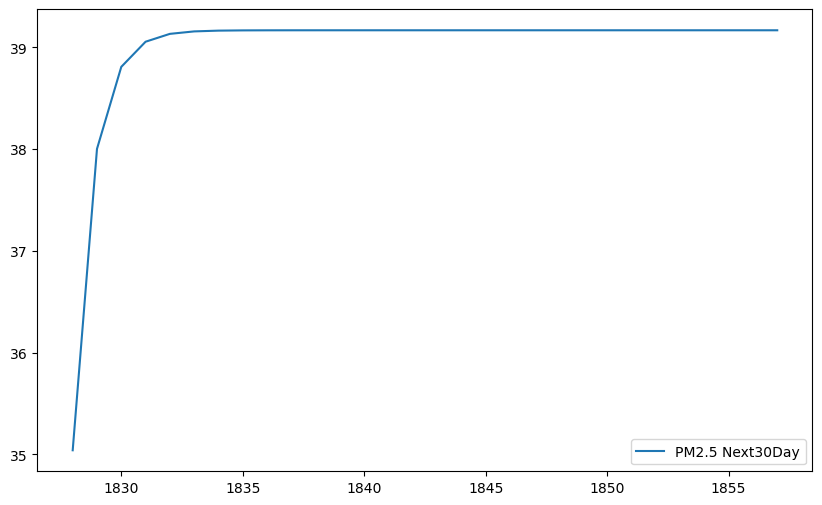

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(next_30_days_index, y_next_30_days[:, 0]) 
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [14]:
test_data.index

RangeIndex(start=1279, stop=1828, step=1)